In [1]:
import os
import shutil
import utilities as rocku
import matplotlib.pyplot as plt
import tomopy
import numpy as np
import pandas as pd
import pprint
import dxchange
import multiprocessing as mp
import timeit

olefile module not found


In [2]:
ncore = 48
if ncore < mp.cpu_count():
    ncore = mp.cpu_count()
ncore

48

In [3]:
# need to change
ipts="23768"
# scan_type = 'ct_scans'
scan_type = 'radiographs'

In [29]:
# scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/" + scan_type
scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/"
os.listdir(scan_loc)

['INL_mask_16mm_0035_10_add.tiff',
 'OB_04dot1mm_0450_10_add.tiff',
 'raw_for_recon',
 'INL_mask_03dot3mm_0700_10_add.tiff',
 '2022_01_09_stability_normalized',
 'INL_mask_08dot2mm_0100_10_add.tiff',
 'OB_16mm_0035_10_add.tiff',
 'HEA_taper_recon',
 '2023_05_23_QHYS_gain_tuning',
 'OB_03dot3mm_0700_10_add.tiff',
 'OB_11mm_0060_10_add.tiff',
 'OB_08dot2mm_0100_10_add.tiff',
 'INL_mask_04dot1mm_0450_10_add.tiff',
 'INL_mask_11mm_0060_10_add.tiff']

In [30]:
###################### need to change start
sample_name = "2023_05_23_QHYS_gain_tuning"
scan_dir = os.path.join(scan_loc, sample_name)
ob_dir = os.path.join(scan_loc, sample_name)
dc_dir = os.path.join(scan_loc, sample_name)
# ob_dir = os.path.join(ob_loc, "2022_12_15_screens")
# dc_dir = os.path.join(dc_loc, "2022_12_15_DC")
# ct_dir = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/raw_to_recon"
# ob_dir = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/raw_to_recon"
# dc_dir = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/raw_to_recon"
ob_name = "*ob*" # Will not be used if follows the default file structure
dc_name = "*dc*" # Will not be used if follows the default file structure
gamma_diff = 20
###################### need to change end

# Preprocess CT scan files

In [31]:
fname_list = os.listdir(scan_dir)
# fname_list.pop(0)
fname_list.sort()

In [32]:
fname_list

['20230523_gain26_0030_0095.tiff',
 '20230523_gain26_0060_0096.tiff',
 '20230523_gain26_0090_0097.tiff',
 '20230523_gain26_0120_0098.tiff',
 '20230523_gain26_0150_0099.tiff',
 '20230523_gain26_0180_0100.tiff',
 '20230523_gain26_dc_0030_0149.tiff',
 '20230523_gain26_dc_0060_0150.tiff',
 '20230523_gain26_dc_0090_0151.tiff',
 '20230523_gain26_dc_0120_0152.tiff',
 '20230523_gain26_dc_0150_0153.tiff',
 '20230523_gain26_dc_0180_0154.tiff',
 '20230523_gain26_ob_0030_0131.tiff',
 '20230523_gain26_ob_0060_0132.tiff',
 '20230523_gain26_ob_0090_0133.tiff',
 '20230523_gain26_ob_0120_0134.tiff',
 '20230523_gain26_ob_0150_0135.tiff',
 '20230523_gain26_ob_0180_0136.tiff',
 '20230523_gain56_0030_0101.tiff',
 '20230523_gain56_0060_0102.tiff',
 '20230523_gain56_0090_0103.tiff',
 '20230523_gain56_0120_0104.tiff',
 '20230523_gain56_0150_0105.tiff',
 '20230523_gain56_0180_0106.tiff',
 '20230523_gain56_dc_0030_0155.tiff',
 '20230523_gain56_dc_0060_0156.tiff',
 '20230523_gain56_dc_0090_0157.tiff',
 '20230523

In [46]:
raw_name = []
ob_name = []
dc_name = []
for idx in range(18):
    if idx < 6:
        raw_name += fname_list[idx::18]
    if 6 <= idx < 12:
        dc_name += fname_list[idx::18]
    if 12 <= idx < 18:
        ob_name += fname_list[idx::18]
raw_name

['20230523_gain26_0030_0095.tiff',
 '20230523_gain56_0030_0101.tiff',
 '20230523_gain85_0030_0113.tiff',
 '20230523_gain_0030_0089.tiff',
 '20230523_gain26_0060_0096.tiff',
 '20230523_gain56_0060_0102.tiff',
 '20230523_gain85_0060_0114.tiff',
 '20230523_gain_0060_0090.tiff',
 '20230523_gain26_0090_0097.tiff',
 '20230523_gain56_0090_0103.tiff',
 '20230523_gain85_0090_0115.tiff',
 '20230523_gain_0090_0091.tiff',
 '20230523_gain26_0120_0098.tiff',
 '20230523_gain56_0120_0104.tiff',
 '20230523_gain85_0120_0116.tiff',
 '20230523_gain_0120_0092.tiff',
 '20230523_gain26_0150_0099.tiff',
 '20230523_gain56_0150_0105.tiff',
 '20230523_gain85_0150_0117.tiff',
 '20230523_gain_0150_0093.tiff',
 '20230523_gain26_0180_0100.tiff',
 '20230523_gain56_0180_0106.tiff',
 '20230523_gain85_0180_0118.tiff',
 '20230523_gain_0180_0094.tiff']

In [47]:
ob_name

['20230523_gain26_ob_0030_0131.tiff',
 '20230523_gain56_ob_0030_0125.tiff',
 '20230523_gain85_ob_0030_0119.tiff',
 '20230523_gain_ob_0030_0137.tiff',
 '20230523_gain26_ob_0060_0132.tiff',
 '20230523_gain56_ob_0060_0126.tiff',
 '20230523_gain85_ob_0060_0120.tiff',
 '20230523_gain_ob_0060_0138.tiff',
 '20230523_gain26_ob_0090_0133.tiff',
 '20230523_gain56_ob_0090_0127.tiff',
 '20230523_gain85_ob_0090_0121.tiff',
 '20230523_gain_ob_0090_0139.tiff',
 '20230523_gain26_ob_0120_0134.tiff',
 '20230523_gain56_ob_0120_0128.tiff',
 '20230523_gain85_ob_0120_0122.tiff',
 '20230523_gain_ob_0120_0140.tiff',
 '20230523_gain26_ob_0150_0135.tiff',
 '20230523_gain56_ob_0150_0129.tiff',
 '20230523_gain85_ob_0150_0123.tiff',
 '20230523_gain_ob_0150_0141.tiff',
 '20230523_gain26_ob_0180_0136.tiff',
 '20230523_gain56_ob_0180_0130.tiff',
 '20230523_gain85_ob_0180_0124.tiff',
 '20230523_gain_ob_0180_0142.tiff']

In [48]:
dc_name

['20230523_gain26_dc_0030_0149.tiff',
 '20230523_gain56_dc_0030_0155.tiff',
 '20230523_gain85_dc_0030_0161.tiff',
 '20230523_gain_dc_0030_0143.tiff',
 '20230523_gain26_dc_0060_0150.tiff',
 '20230523_gain56_dc_0060_0156.tiff',
 '20230523_gain85_dc_0060_0162.tiff',
 '20230523_gain_dc_0060_0144.tiff',
 '20230523_gain26_dc_0090_0151.tiff',
 '20230523_gain56_dc_0090_0157.tiff',
 '20230523_gain85_dc_0090_0163.tiff',
 '20230523_gain_dc_0090_0145.tiff',
 '20230523_gain26_dc_0120_0152.tiff',
 '20230523_gain56_dc_0120_0158.tiff',
 '20230523_gain85_dc_0120_0164.tiff',
 '20230523_gain_dc_0120_0146.tiff',
 '20230523_gain26_dc_0150_0153.tiff',
 '20230523_gain56_dc_0150_0159.tiff',
 '20230523_gain85_dc_0150_0165.tiff',
 '20230523_gain_dc_0150_0147.tiff',
 '20230523_gain26_dc_0180_0154.tiff',
 '20230523_gain56_dc_0180_0160.tiff',
 '20230523_gain85_dc_0180_0166.tiff',
 '20230523_gain_dc_0180_0148.tiff']

In [52]:
save_to = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/normalized/" + sample_name
for n, each in enumerate(raw_name):
# for n, each in enumerate(['20230523_gain26_0030_0095.tiff']):
    _scan_raw = rocku.read_tiff_stack(scan_dir, [raw_name[n], ob_name[n], dc_name[n]])
    _scan_clean = tomopy.misc.corr.remove_outlier(_scan_raw, gamma_diff, ncore=ncore).astype(np.ushort)
    _scan_norm, ob_med, dc_med = rocku.normalize(_scan_clean[0], _scan_clean[1], _scan_clean[2])
    fname = save_to + "/" + each
    print('Saving to {} ...'.format(fname))
    dxchange.write_tiff(_scan_norm, fname=fname, overwrite=True)

3it [00:00, 10.38it/s]


Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving to /HFIR/CG1D/IPTS-23768/shared/processed_data/normalized/2023_05_23_QHYS_gain_tuning/20230523_gain26_0030_0095.tiff ...


3it [00:00, 12.51it/s]


Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving to /HFIR/CG1D/IPTS-23768/shared/processed_data/normalized/2023_05_23_QHYS_gain_tuning/20230523_gain56_0030_0101.tiff ...


3it [00:00, 10.14it/s]


Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving to /HFIR/CG1D/IPTS-23768/shared/processed_data/normalized/2023_05_23_QHYS_gain_tuning/20230523_gain85_0030_0113.tiff ...


3it [00:00, 11.44it/s]


Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving to /HFIR/CG1D/IPTS-23768/shared/processed_data/normalized/2023_05_23_QHYS_gain_tuning/20230523_gain_0030_0089.tiff ...


3it [00:00, 11.95it/s]


Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving to /HFIR/CG1D/IPTS-23768/shared/processed_data/normalized/2023_05_23_QHYS_gain_tuning/20230523_gain26_0060_0096.tiff ...


3it [00:00, 11.98it/s]


Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving to /HFIR/CG1D/IPTS-23768/shared/processed_data/normalized/2023_05_23_QHYS_gain_tuning/20230523_gain56_0060_0102.tiff ...


3it [00:00, 12.36it/s]


Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving to /HFIR/CG1D/IPTS-23768/shared/processed_data/normalized/2023_05_23_QHYS_gain_tuning/20230523_gain85_0060_0114.tiff ...


3it [00:00, 11.95it/s]


Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving to /HFIR/CG1D/IPTS-23768/shared/processed_data/normalized/2023_05_23_QHYS_gain_tuning/20230523_gain_0060_0090.tiff ...


3it [00:00,  7.95it/s]


Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving to /HFIR/CG1D/IPTS-23768/shared/processed_data/normalized/2023_05_23_QHYS_gain_tuning/20230523_gain26_0090_0097.tiff ...


3it [00:00, 12.07it/s]


Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving to /HFIR/CG1D/IPTS-23768/shared/processed_data/normalized/2023_05_23_QHYS_gain_tuning/20230523_gain56_0090_0103.tiff ...


3it [00:00, 12.81it/s]


Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving to /HFIR/CG1D/IPTS-23768/shared/processed_data/normalized/2023_05_23_QHYS_gain_tuning/20230523_gain85_0090_0115.tiff ...


3it [00:00, 12.75it/s]


Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving to /HFIR/CG1D/IPTS-23768/shared/processed_data/normalized/2023_05_23_QHYS_gain_tuning/20230523_gain_0090_0091.tiff ...


3it [00:00, 12.60it/s]


Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving to /HFIR/CG1D/IPTS-23768/shared/processed_data/normalized/2023_05_23_QHYS_gain_tuning/20230523_gain26_0120_0098.tiff ...


3it [00:00, 13.02it/s]


Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving to /HFIR/CG1D/IPTS-23768/shared/processed_data/normalized/2023_05_23_QHYS_gain_tuning/20230523_gain56_0120_0104.tiff ...


3it [00:00, 12.77it/s]


Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving to /HFIR/CG1D/IPTS-23768/shared/processed_data/normalized/2023_05_23_QHYS_gain_tuning/20230523_gain85_0120_0116.tiff ...


3it [00:00, 10.78it/s]


Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving to /HFIR/CG1D/IPTS-23768/shared/processed_data/normalized/2023_05_23_QHYS_gain_tuning/20230523_gain_0120_0092.tiff ...


3it [00:00, 10.82it/s]


Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving to /HFIR/CG1D/IPTS-23768/shared/processed_data/normalized/2023_05_23_QHYS_gain_tuning/20230523_gain26_0150_0099.tiff ...


3it [00:00,  9.62it/s]


Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving to /HFIR/CG1D/IPTS-23768/shared/processed_data/normalized/2023_05_23_QHYS_gain_tuning/20230523_gain56_0150_0105.tiff ...


3it [00:00,  9.23it/s]


Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving to /HFIR/CG1D/IPTS-23768/shared/processed_data/normalized/2023_05_23_QHYS_gain_tuning/20230523_gain85_0150_0117.tiff ...


3it [00:00,  9.31it/s]


Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving to /HFIR/CG1D/IPTS-23768/shared/processed_data/normalized/2023_05_23_QHYS_gain_tuning/20230523_gain_0150_0093.tiff ...


3it [00:00,  8.85it/s]


Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving to /HFIR/CG1D/IPTS-23768/shared/processed_data/normalized/2023_05_23_QHYS_gain_tuning/20230523_gain26_0180_0100.tiff ...


3it [00:00,  8.85it/s]


Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving to /HFIR/CG1D/IPTS-23768/shared/processed_data/normalized/2023_05_23_QHYS_gain_tuning/20230523_gain56_0180_0106.tiff ...


3it [00:00,  8.81it/s]


Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving to /HFIR/CG1D/IPTS-23768/shared/processed_data/normalized/2023_05_23_QHYS_gain_tuning/20230523_gain85_0180_0118.tiff ...


3it [00:00,  8.94it/s]


Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving to /HFIR/CG1D/IPTS-23768/shared/processed_data/normalized/2023_05_23_QHYS_gain_tuning/20230523_gain_0180_0094.tiff ...


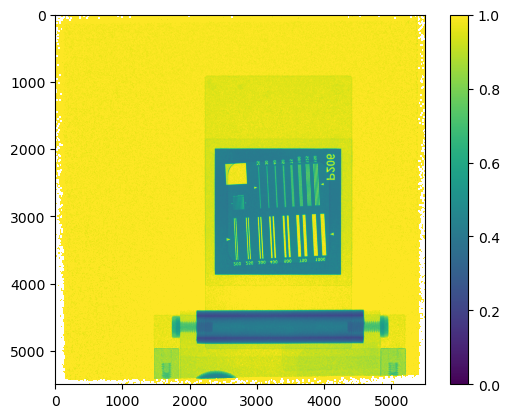

In [51]:
plt.imshow(_scan_norm, vmin=0, vmax=1)
plt.colorbar()
plt.show()